In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier


def load_data(csv_file):


    df = pd.read_csv(csv_file)

    cols_to_drop = [col for col in df.columns if 'diagnostics_' in col or col in ['Image']]
    df_cleaned = df.drop(columns=cols_to_drop)

    print(f"Columns dropped: {cols_to_drop}")
    print(f"Remaining columns: {len(df_cleaned.columns)}")
    return df_cleaned

def prepare_data(df):

    label_encoder = LabelEncoder()
    df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

    df = df.drop(columns=['Category'])

    X = df.drop(columns=['Category_encoded'])
    y = df['Category_encoded']

    return X, y, label_encoder


def feature_selection(X, y, n_features_to_select=20):

    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


    rfe = RFE(estimator=xgb_clf, n_features_to_select=n_features_to_select, step=1)

    print("Starting feature selection...")

    rfe.fit(X, y)


    selected_features = X.columns[rfe.support_]
    print(f"Selected {n_features_to_select} features:\n{selected_features}")

    return selected_features


def save_selected_features(X, selected_features, output_file):

    X_selected = X[selected_features]
    X_selected.to_csv(output_file, index=False)
    print(f"Selected features saved to {output_file}")

def main():

    input_csv = "/content/radiomic_features (3).csv"
    output_csv = "selected_radiomic_features.csv"


    df = load_data(input_csv)

    X, y, label_encoder = prepare_data(df)

    n_features_to_select = 20
    selected_features = feature_selection(X, y, n_features_to_select=n_features_to_select)

    save_selected_features(X, selected_features, output_csv)

    print("\nFeature selection process complete!")

if __name__ == "__main__":
    main()



Training Logistic Regression...
Accuracy: 0.8727
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.14        40
           1       0.99      0.98      0.99       174
           2       0.74      0.99      0.85       116

    accuracy                           0.87       330
   macro avg       0.91      0.68      0.66       330
weighted avg       0.90      0.87      0.83       330



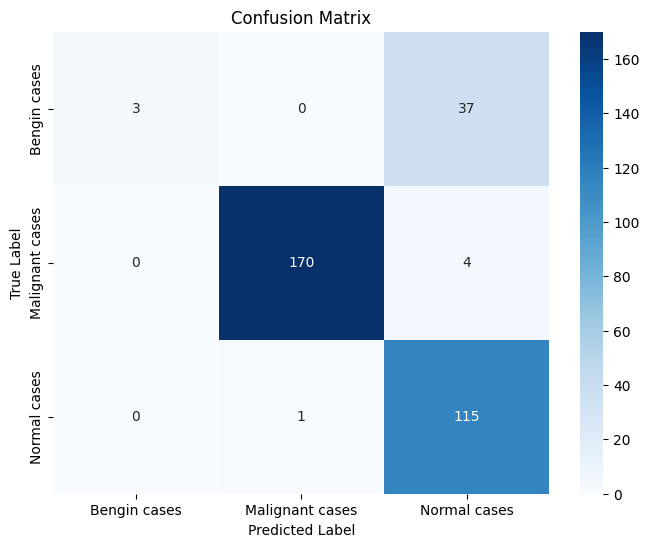


Training Decision Tree...
Accuracy: 0.9242
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        40
           1       0.99      1.00      0.99       174
           2       0.89      0.90      0.89       116

    accuracy                           0.92       330
   macro avg       0.87      0.86      0.86       330
weighted avg       0.92      0.92      0.92       330



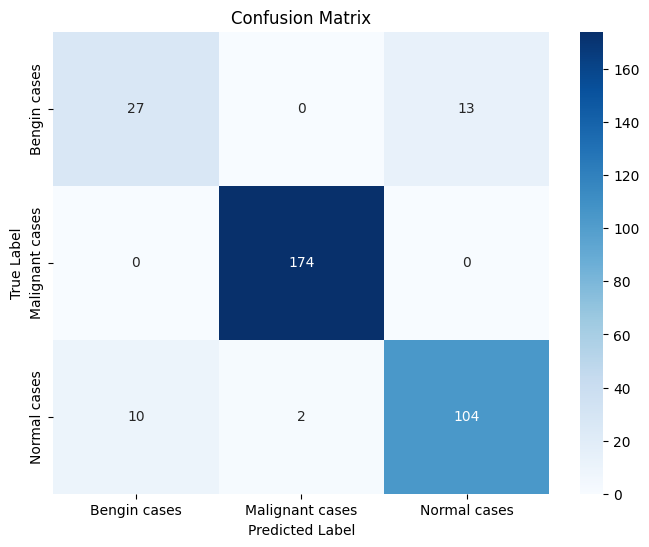


Training Random Forest...
Accuracy: 0.9636
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85        40
           1       1.00      0.99      1.00       174
           2       0.91      0.99      0.95       116

    accuracy                           0.96       330
   macro avg       0.96      0.91      0.93       330
weighted avg       0.97      0.96      0.96       330



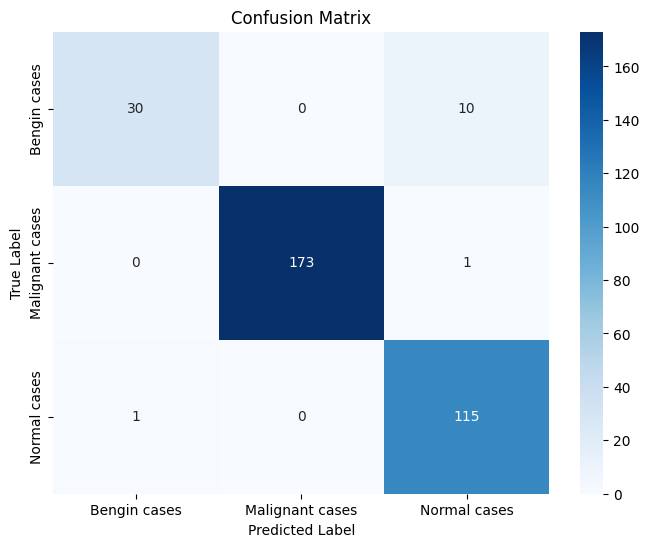


Training Gradient Boosting...
Accuracy: 0.9545
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        40
           1       0.99      0.99      0.99       174
           2       0.90      0.98      0.94       116

    accuracy                           0.95       330
   macro avg       0.95      0.89      0.92       330
weighted avg       0.96      0.95      0.95       330



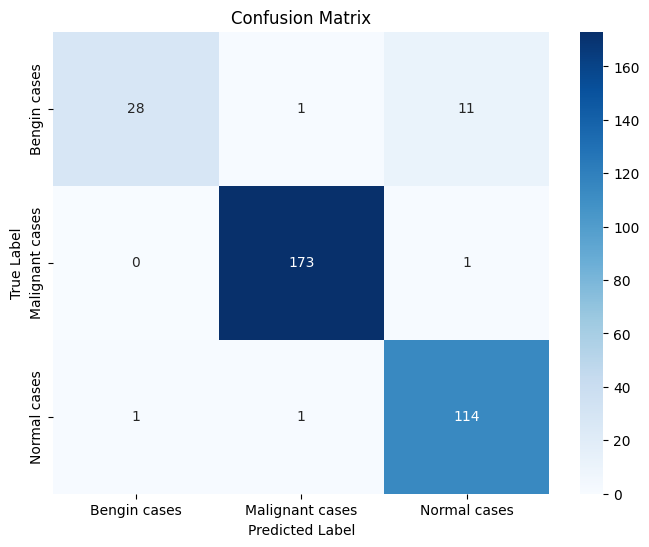


Training Support Vector Machine...
Accuracy: 0.8636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        40
           1       1.00      0.96      0.98       174
           2       0.72      1.00      0.84       116

    accuracy                           0.86       330
   macro avg       0.91      0.67      0.64       330
weighted avg       0.90      0.86      0.82       330



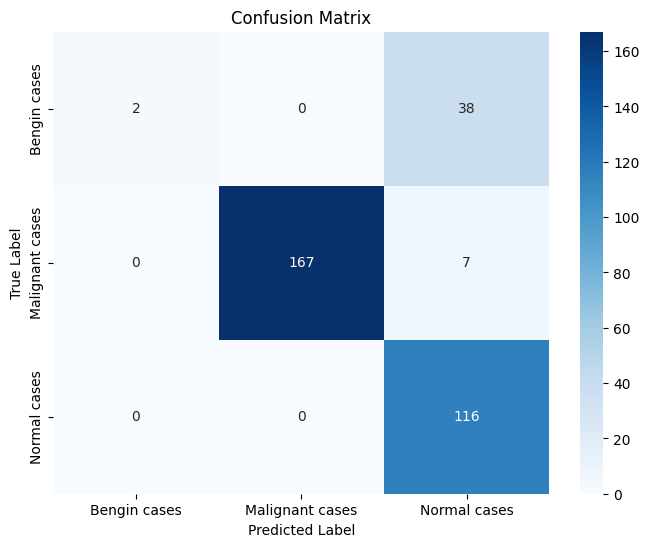


Training K-Nearest Neighbors...
Accuracy: 0.9364
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.69        40
           1       0.98      1.00      0.99       174
           2       0.89      0.97      0.93       116

    accuracy                           0.94       330
   macro avg       0.91      0.85      0.87       330
weighted avg       0.93      0.94      0.93       330



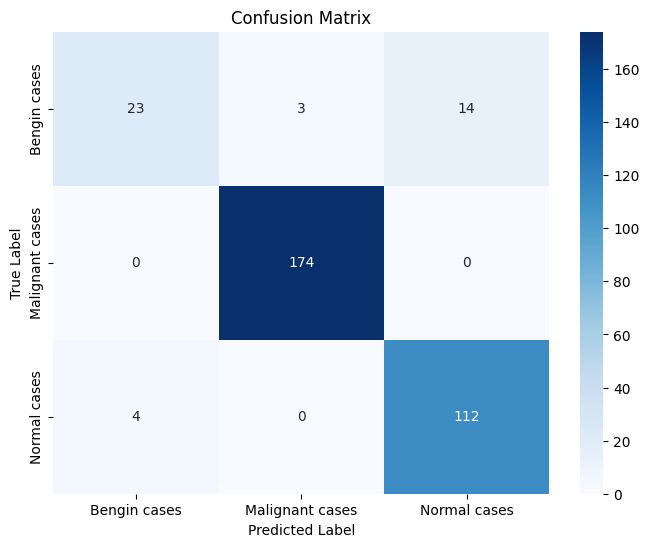


Training Naive Bayes...
Accuracy: 0.7061
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.95      0.46        40
           1       0.96      0.96      0.96       174
           2       0.93      0.24      0.38       116

    accuracy                           0.71       330
   macro avg       0.73      0.72      0.60       330
weighted avg       0.87      0.71      0.70       330



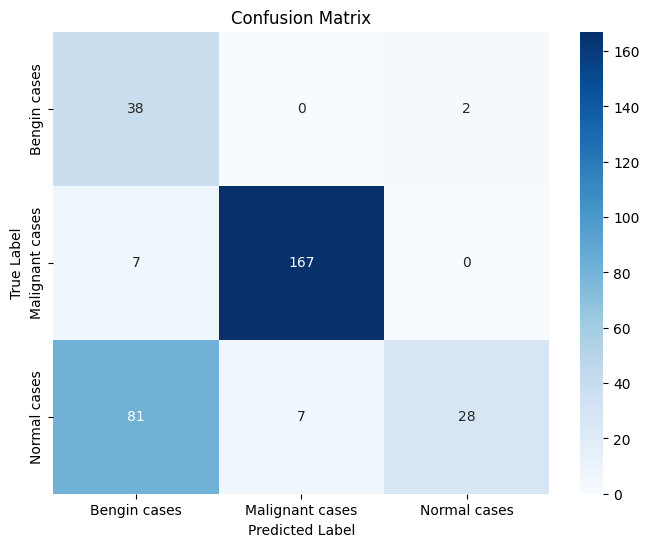


Best model: RandomForestClassifier with accuracy 0.9636


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(features_csv, all_features_csv):

    selected_features_df = pd.read_csv(features_csv)
    selected_features = selected_features_df['Feature'].values

    data_df = pd.read_csv(all_features_csv)

    return data_df, selected_features

def preprocess_data(df, selected_features):

    X = df[selected_features]
    y = df['Category']


    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y_encoded, label_encoder

def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy

def plot_confusion_matrix(y_test, y_pred, label_encoder):

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

features_csv = '/content/selected_radiomic_features (1).csv'
all_features_csv = '/content/radiomic_features (3).csv'
df, selected_features = load_data(features_csv, all_features_csv)

X, y, label_encoder = preprocess_data(df, selected_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


best_model = None
best_accuracy = 0
for model_name, model in models.items():          # Train and evaluate each model
    print(f"\nTraining {model_name}...")
    accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Plot the confusion matrix for each model
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, label_encoder)

print(f"\nBest model: {best_model.__class__.__name__} with accuracy {best_accuracy:.4f}")
